In [1]:
import json

# Path to your JSON file (adjust the path as needed)
file_path = './football.json-master/2023-24/it.1.json'

# Open the JSON file and load the data
with open(file_path, 'r') as file:
    data = json.load(file)

# Print out the structure of the data to understand its format
print(data)


{'name': 'Serie A 2023/24', 'matches': [{'round': 'Matchday 1', 'date': '2023-08-19', 'time': '18:30', 'team1': 'Empoli FC', 'team2': 'Hellas Verona FC', 'score': {'ht': [0, 0], 'ft': [0, 1]}}, {'round': 'Matchday 1', 'date': '2023-08-19', 'time': '18:30', 'team1': 'Frosinone Calcio', 'team2': 'SSC Napoli', 'score': {'ht': [1, 2], 'ft': [1, 3]}}, {'round': 'Matchday 1', 'date': '2023-08-19', 'time': '20:45', 'team1': 'Genoa CFC', 'team2': 'ACF Fiorentina', 'score': {'ht': [0, 3], 'ft': [1, 4]}}, {'round': 'Matchday 1', 'date': '2023-08-19', 'time': '20:45', 'team1': 'FC Internazionale Milano', 'team2': 'AC Monza', 'score': {'ht': [1, 0], 'ft': [2, 0]}}, {'round': 'Matchday 1', 'date': '2023-08-20', 'time': '18:30', 'team1': 'AS Roma', 'team2': 'US Salernitana 1919', 'score': {'ht': [1, 1], 'ft': [2, 2]}}, {'round': 'Matchday 1', 'date': '2023-08-20', 'time': '18:30', 'team1': 'US Sassuolo Calcio', 'team2': 'Atalanta BC', 'score': {'ht': [0, 0], 'ft': [0, 2]}}, {'round': 'Matchday 1', '

In [2]:
import pandas as pd
# Convert the matches data to a DataFrame
matches = data['matches']
df = pd.DataFrame(matches)

In [3]:
df

,round,date,time,team1,team2,score
0,Matchday 1,2023-08-19,18:30,Empoli FC,Hellas Verona FC,"{'ht': [0, 0], 'ft': [0, 1]}"
1,Matchday 1,2023-08-19,18:30,Frosinone Calcio,SSC Napoli,"{'ht': [1, 2], 'ft': [1, 3]}"
2,Matchday 1,2023-08-19,20:45,Genoa CFC,ACF Fiorentina,"{'ht': [0, 3], 'ft': [1, 4]}"
3,Matchday 1,2023-08-19,20:45,FC Internazionale Milano,AC Monza,"{'ht': [1, 0], 'ft': [2, 0]}"
4,Matchday 1,2023-08-20,18:30,AS Roma,US Salernitana 1919,"{'ht': [1, 1], 'ft': [2, 2]}"
...,...,...,...,...,...,...
375,Matchday 38,2024-05-26,20:45,Empoli FC,AS Roma,"{'ht': [1, 1], 'ft': [2, 1]}"
376,Matchday 38,2024-05-26,20:45,Frosinone Calcio,Udinese Calcio,"{'ht': [0, 0], 'ft': [0, 1]}"
377,Matchday 38,2024-05-26,20:45,Hellas Verona FC,FC Internazionale Milano,"{'ht': [2, 2], 'ft': [2, 2]}"
378,Matchday 38,2024-05-26,20:45,SS Lazio,US Sassuolo Calcio,"{'ht': [0, 0], 'ft': [1, 1]}"


In [4]:
type(df.score[0]['ht'])

list

In [5]:
df['ht_team1'] = df['score'].apply(lambda x: x.get('ht', [0, 0])[0])  # First half score for team 1
df['ht_team2'] = df['score'].apply(lambda x: x.get('ht', [0, 0])[1])  # First half score for team 2
df['ft_team1'] = df['score'].apply(lambda x: x.get('ft', [0, 0])[0])  # Full-time score for team 1
df['ft_team2'] = df['score'].apply(lambda x: x.get('ft', [0, 0])[1])  # Full-time score for team 2


In [6]:
# Drop the 'score' column
df.drop('score', axis=1, inplace=True)

if there is only ft that is 0,0, the first time is 0,0

In [7]:
df

,round,date,time,team1,team2,ht_team1,ht_team2,ft_team1,ft_team2
0,Matchday 1,2023-08-19,18:30,Empoli FC,Hellas Verona FC,0,0,0,1
1,Matchday 1,2023-08-19,18:30,Frosinone Calcio,SSC Napoli,1,2,1,3
2,Matchday 1,2023-08-19,20:45,Genoa CFC,ACF Fiorentina,0,3,1,4
3,Matchday 1,2023-08-19,20:45,FC Internazionale Milano,AC Monza,1,0,2,0
4,Matchday 1,2023-08-20,18:30,AS Roma,US Salernitana 1919,1,1,2,2
...,...,...,...,...,...,...,...,...,...
375,Matchday 38,2024-05-26,20:45,Empoli FC,AS Roma,1,1,2,1
376,Matchday 38,2024-05-26,20:45,Frosinone Calcio,Udinese Calcio,0,0,0,1
377,Matchday 38,2024-05-26,20:45,Hellas Verona FC,FC Internazionale Milano,2,2,2,2
378,Matchday 38,2024-05-26,20:45,SS Lazio,US Sassuolo Calcio,0,0,1,1


In [8]:
total_goals = df['ft_team1'].sum() + df['ft_team2'].sum()
print(f"Total goals scored: {total_goals}")

Total goals scored: 992


In [9]:
# Example: Team performance (wins, losses, draws)
def result(row):
    if row['ft_team1'] > row['ft_team2']:
        return 'team1_win'
    elif row['ft_team1'] < row['ft_team2']:
        return 'team2_win'
    else:
        return 'draw'

df['result'] = df.apply(result, axis=1)

In [10]:
# Home Performance: Adding Goals For and Against
home_performance = df.groupby('team1').agg(
    wins=('result', lambda x: (x == 'team1_win').sum()),
    draws=('result', lambda x: (x == 'draw').sum()),
    losses=('result', lambda x: (x == 'team2_win').sum()),
    goals_for=('ft_team1', 'sum'),
    goals_against=('ft_team2', 'sum')
)
home_performance.index.name = 'team, home'

# Away Performance: Adding Goals For and Against
away_performance = df.groupby('team2').agg(
    wins=('result', lambda x: (x == 'team2_win').sum()),
    draws=('result', lambda x: (x == 'draw').sum()),
    losses=('result', lambda x: (x == 'team1_win').sum()),
    goals_for=('ft_team2', 'sum'),
    goals_against=('ft_team1', 'sum')
)
away_performance.index.name = 'team, away'

total_performance = home_performance.add(away_performance, fill_value=0)
total_performance.index.name = 'team, overall'
   
total_performance['win_rate'] = total_performance['wins'] / (total_performance['wins'] + total_performance['draws'] + total_performance['losses'])
display(total_performance[['wins', 'win_rate']])
total_performance['points'] = total_performance['wins'] * 3 + total_performance['draws']
total_performance.sort_values('points', ascending=False, inplace=True)

home_performance['goal_difference'] = home_performance['goals_for'] - home_performance['goals_against']
away_performance['goal_difference'] = away_performance['goals_for'] - away_performance['goals_against']
total_performance['goal_difference'] = total_performance['goals_for'] - total_performance['goals_against']
display(home_performance)
display(away_performance)

,wins,win_rate
"team, overall",,
AC Milan,22,0.578947
AC Monza,11,0.289474
ACF Fiorentina,17,0.447368
AS Roma,18,0.473684
Atalanta BC,21,0.552632
Bologna FC 1909,18,0.473684
Cagliari Calcio,8,0.210526
Empoli FC,9,0.236842
FC Internazionale Milano,29,0.763158


,wins,draws,losses,goals_for,goals_against,goal_difference
"team, overall",,,,,,
AC Milan,12,4,3,38,17,21
AC Monza,6,6,7,23,26,-3
ACF Fiorentina,10,5,4,37,22,15
AS Roma,12,4,3,38,19,19
Atalanta BC,13,2,4,42,16,26
Bologna FC 1909,12,5,2,33,12,21
Cagliari Calcio,6,7,6,28,32,-4
Empoli FC,5,5,9,15,23,-8
FC Internazionale Milano,14,4,1,44,11,33


,wins,draws,losses,goals_for,goals_against,goal_difference
"team, away",,,,,,
AC Milan,10,5,4,38,32,6
AC Monza,5,6,8,16,25,-9
ACF Fiorentina,7,4,8,24,24,0
AS Roma,6,5,8,27,27,0
Atalanta BC,8,4,7,30,26,4
Bologna FC 1909,6,9,4,21,20,1
Cagliari Calcio,2,5,12,14,36,-22
Empoli FC,4,4,11,14,31,-17
FC Internazionale Milano,15,3,1,45,11,34


In [11]:
# some more statistics
total_matches = df.shape[0]
total_wins_home = df[df['result'] == 'team1_win'].shape[0]
total_wins_away = df[df['result'] == 'team2_win'].shape[0]
total_draws = df[df['result'] == 'draw'].shape[0]

print(f"Total matches: {total_matches}")
print(f"Total wins home: {total_wins_home}")
print(f"Total wins away: {total_wins_away}")
print(f"Total draws: {total_draws}")

Total matches: 380
Total wins home: 159
Total wins away: 109
Total draws: 112


In [12]:
total_performance.reset_index(inplace=True)
total_performance = total_performance[['team, overall', 'points', 'wins', 'draws', 'losses', 'goals_for', 'goals_against', 'goal_difference', 'win_rate']]
total_performance

,"team, overall",points,wins,draws,losses,goals_for,goals_against,goal_difference,win_rate
0,FC Internazionale Milano,94,29,7,2,89,22,67,0.763158
1,AC Milan,75,22,9,7,76,49,27,0.578947
2,Juventus FC,71,19,14,5,54,31,23,0.500000
3,Atalanta BC,69,21,6,11,72,42,30,0.552632
4,Bologna FC 1909,68,18,14,6,54,32,22,0.473684
5,AS Roma,63,18,9,11,65,46,19,0.473684
6,SS Lazio,61,18,7,13,49,39,10,0.473684
7,ACF Fiorentina,60,17,9,12,61,46,15,0.447368
8,Torino FC,53,13,14,11,36,36,0,0.342105
9,SSC Napoli,53,13,14,11,55,48,7,0.342105


In [13]:
df

,round,date,time,team1,team2,ht_team1,ht_team2,ft_team1,ft_team2,result
0,Matchday 1,2023-08-19,18:30,Empoli FC,Hellas Verona FC,0,0,0,1,team2_win
1,Matchday 1,2023-08-19,18:30,Frosinone Calcio,SSC Napoli,1,2,1,3,team2_win
2,Matchday 1,2023-08-19,20:45,Genoa CFC,ACF Fiorentina,0,3,1,4,team2_win
3,Matchday 1,2023-08-19,20:45,FC Internazionale Milano,AC Monza,1,0,2,0,team1_win
4,Matchday 1,2023-08-20,18:30,AS Roma,US Salernitana 1919,1,1,2,2,draw
...,...,...,...,...,...,...,...,...,...,...
375,Matchday 38,2024-05-26,20:45,Empoli FC,AS Roma,1,1,2,1,team1_win
376,Matchday 38,2024-05-26,20:45,Frosinone Calcio,Udinese Calcio,0,0,0,1,team2_win
377,Matchday 38,2024-05-26,20:45,Hellas Verona FC,FC Internazionale Milano,2,2,2,2,draw
378,Matchday 38,2024-05-26,20:45,SS Lazio,US Sassuolo Calcio,0,0,1,1,draw


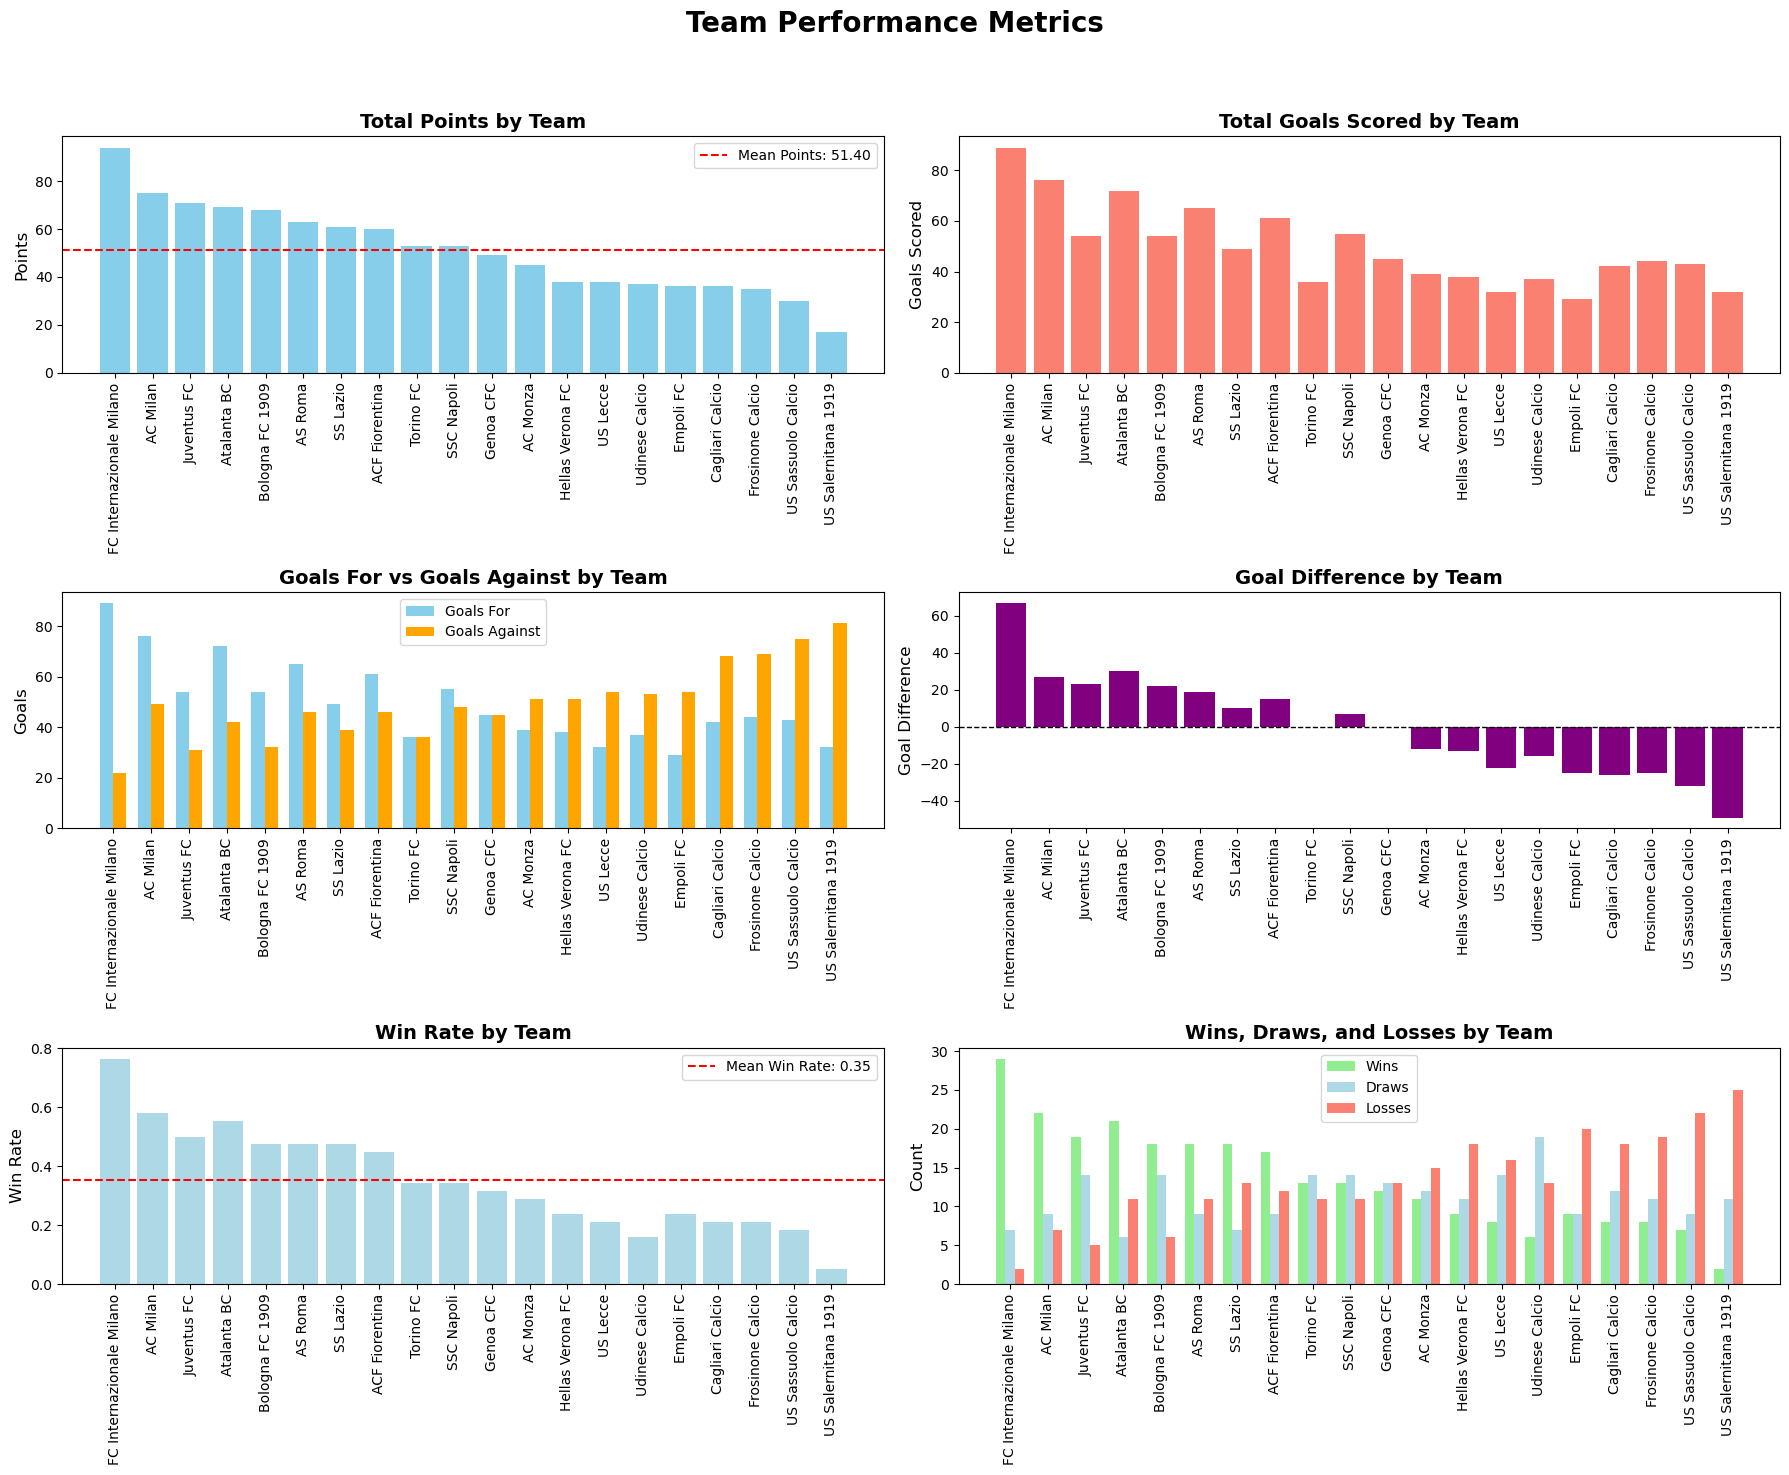

In [14]:
import matplotlib.pyplot as plt
import numpy as np

# Sort the data by total points
sorted_performance = total_performance.sort_values(by='points', ascending=False)
team_labels = sorted_performance['team, overall']
team_indices = np.arange(len(team_labels))

# Set up the figure and axes
fig, axes = plt.subplots(3, 2, figsize=(18, 15))
fig.suptitle('Team Performance Metrics', fontsize=20, fontweight='bold')

# 1. Total Points by Team
axes[0, 0].bar(team_indices, sorted_performance['points'], color='skyblue')
axes[0, 0].set_title('Total Points by Team', fontsize=14, fontweight='bold')
axes[0, 0].set_ylabel('Points', fontsize=12)
axes[0, 0].set_xticks(team_indices)
axes[0, 0].set_xticklabels(team_labels, fontsize=10, rotation=90)
axes[0, 0].axhline(sorted_performance['points'].mean(), color='red', linestyle='--', linewidth=1.5, label=f"Mean Points: {sorted_performance['points'].mean():.2f}")
axes[0, 0].legend(fontsize=10)

# 2. Total Goals Scored by Team
axes[0, 1].bar(team_indices, sorted_performance['goals_for'], color='salmon')
axes[0, 1].set_title('Total Goals Scored by Team', fontsize=14, fontweight='bold')
axes[0, 1].set_ylabel('Goals Scored', fontsize=12)
axes[0, 1].set_xticks(team_indices)
axes[0, 1].set_xticklabels(team_labels, fontsize=10, rotation=90)

# 3. Goals For vs Goals Against
bar_width = 0.35
axes[1, 0].bar(team_indices - bar_width / 2, sorted_performance['goals_for'], bar_width, label='Goals For', color='skyblue')
axes[1, 0].bar(team_indices + bar_width / 2, sorted_performance['goals_against'], bar_width, label='Goals Against', color='orange')
axes[1, 0].set_title('Goals For vs Goals Against by Team', fontsize=14, fontweight='bold')
axes[1, 0].set_ylabel('Goals', fontsize=12)
axes[1, 0].set_xticks(team_indices)
axes[1, 0].set_xticklabels(team_labels, fontsize=10, rotation=90)
axes[1, 0].legend(fontsize=10)

# 4. Goal Difference by Team
axes[1, 1].bar(team_indices, sorted_performance['goal_difference'], color='purple')
axes[1, 1].set_title('Goal Difference by Team', fontsize=14, fontweight='bold')
axes[1, 1].set_ylabel('Goal Difference', fontsize=12)
axes[1, 1].set_xticks(team_indices)
axes[1, 1].set_xticklabels(team_labels, fontsize=10, rotation=90)
axes[1, 1].axhline(0, color='black', linestyle='--', linewidth=1)

# 5. Win Rate by Team
axes[2, 0].bar(team_indices, sorted_performance['win_rate'], color='lightblue')
axes[2, 0].set_title('Win Rate by Team', fontsize=14, fontweight='bold')
axes[2, 0].set_ylabel('Win Rate', fontsize=12)
axes[2, 0].set_xticks(team_indices)
axes[2, 0].set_xticklabels(team_labels, fontsize=10, rotation=90)
axes[2, 0].axhline(sorted_performance['win_rate'].mean(), color='red', linestyle='--', linewidth=1.5, label=f"Mean Win Rate: {sorted_performance['win_rate'].mean():.2f}")
axes[2, 0].legend(fontsize=10)

# 6. Wins, Draws, and Losses by Team
width = 0.25
axes[2, 1].bar(team_indices - width, sorted_performance['wins'], width, label='Wins', color='lightgreen')
axes[2, 1].bar(team_indices, sorted_performance['draws'], width, label='Draws', color='lightblue')
axes[2, 1].bar(team_indices + width, sorted_performance['losses'], width, label='Losses', color='salmon')
axes[2, 1].set_title('Wins, Draws, and Losses by Team', fontsize=14, fontweight='bold')
axes[2, 1].set_ylabel('Count', fontsize=12)
axes[2, 1].set_xticks(team_indices)
axes[2, 1].set_xticklabels(team_labels, fontsize=10, rotation=90)
axes[2, 1].legend(fontsize=10)

# Adjust layout
plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()


In [15]:
df.team1.unique()

array(['Empoli FC', 'Frosinone Calcio', 'Genoa CFC',
       'FC Internazionale Milano', 'AS Roma', 'US Sassuolo Calcio',
       'US Lecce', 'Udinese Calcio', 'Torino FC', 'Bologna FC 1909',
       'AC Monza', 'Hellas Verona FC', 'AC Milan', 'ACF Fiorentina',
       'Juventus FC', 'SS Lazio', 'SSC Napoli', 'US Salernitana 1919',
       'Cagliari Calcio', 'Atalanta BC'], dtype=object)

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from keras.models import Model
from keras.layers import Input, Dense, Concatenate

# Load and preprocess data
data = df.copy()
# Encode categorical variables
team_encoder = LabelEncoder()
data['team1'] = team_encoder.fit_transform(data['team1'])
data['team2'] = team_encoder.transform(data['team2'])

# Create target variable
data['result'] = np.sign(data['ft_team1'] - data['ft_team2'])  # 1: win, 0: draw, -1: loss

# Split dataset
X = data.drop(['result', 'ft_team1', 'ft_team2'], axis=1)
y = data['result']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Build a hierarchical model
# Championship Input
champ_input = Input(shape=(num_champ_features,))
champ_dense = Dense(64, activation='relu')(champ_input)

# Team Inputs
team1_input = Input(shape=(num_team_features,))
team2_input = Input(shape=(num_team_features,))
team1_dense = Dense(64, activation='relu')(team1_input)
team2_dense = Dense(64, activation='relu')(team2_input)

# Match Input
match_input = Input(shape=(num_match_features,))
match_dense = Dense(64, activation='relu')(match_input)

# Combine
combined = Concatenate()([champ_dense, team1_dense, team2_dense, match_dense])
output = Dense(3, activation='softmax')(combined)  # 3 classes: win/draw/loss

model = Model(inputs=[champ_input, team1_input, team2_input, match_input], outputs=output)
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Train the model
model.fit([X_train_champ, X_train_team1, X_train_team2, X_train_match], y_train, epochs=10, batch_size=32)
